# Исследование надежности заемщиков

**Заказчик** — кредитный отдел банка. 

**Цель** - разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. 

**Входные данные от банка** — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Обзор данных

Оценим данные, прредоставленные банком визуально. Для этого выведем первые 30 строк таблицы на экран.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv') 

In [3]:
df.head(30)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Описание данных**:

 * children — количество детей в семье;
 * days_employed — общий трудовой стаж в днях;
 * dob_years — возраст клиента в годах;
 * education — уровень образования клиента;
 * education_id — идентификатор уровня образования;
 * family_status — семейное положение;
 * family_status_id — идентификатор семейного положения;
 * gender — пол клиента;
 * income_type — тип занятости;
 * debt — имел ли задолженность по возврату кредитов;
 * total_income — ежемесячный доход;
 * purpose — цель получения кредита.
 
     Визуально можно обнаружить, что встречаются пропуски данных, а также есть дубликаты в данных из-за нарушения регистра при записи данных. Также пока не понятно, почему в некоторых строках общий трудовой стаж указан не целыми числами и с отрицательным значением. С этим нужно будет разобраться далее.     

## Заполнение пропусков

Узнаем в каких столбцах могут встречаться пропуски в значениях:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Количество значений в столбцах различается. Значит, в данных есть пропущенные значения в столбцах 'days_employed' и 'total_income'. Посчитаем количество пропусков в столбцах: "days_employed" и "total_income": 

In [5]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [6]:
df.isna().mean()
#процент пропусков

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

**Пропущенных значений** - 2174 в каждом столбце. Всего строк в таблице - 21525. 

Процент пропущенных значений от общего числа строк - 10,1%.
Так как доля пропусков значительная, удалить без влияния на данные мы ее не можем. 
Причин пропусков может быть несколько, например, неофициальное оформление, пенсионный статус, отсутсвие рабочего стажа и официального дохода и тд.

Так как данные в обоих столбцах - количественные, мы заполним их характерными значениями, а именно медианным значением, так как ведь в данных могут быть выдающиеся значения, которые сместят среднее. 

Также мы видим в столбцах 'days_employed' и 'children' аномальные значения со знаком минус. Такое могло произойти из-за ошибок при внесениии данных. Исправим их перед заполнением заполнением пропусков медианным значением:

In [7]:
df['days_employed'] = df['days_employed'].abs()    
df['children'] = df['children'].abs() 

In [8]:
days_employed_median = df['days_employed'].median()
print('days_employed_median', days_employed_median)

total_income_median = df['total_income'].median()
print('total_income_median:', total_income_median)

days_employed_median 2194.220566878695
total_income_median: 145017.93753253992


Заменим пропуски на медианные значения в датасете:

In [9]:
df['days_employed'] = df['days_employed'].fillna(days_employed_median)
df['total_income'] = df['total_income'].fillna(total_income_median)

Еще раз проверим количество пропусков:

In [10]:
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Пропусков в датасете не осталось, замена прошла успешно.

## Проверка данных на аномалии и исправления

Ранее мы обнаружили и исправили в столбце 'days_employed' аномальные значения со знаком минус. Такое могло произойти из-за ошибок при внесениии данных. 

Следующее, что бросается в глаза - это разный регистр данных в колонке 'education':

In [11]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Приведем данные в колонке 'education' к единому регистру:

In [12]:
df['education'] = df['education'].str.lower()
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Ошибки в регистре исправлены.

Проверим значения в колонке "children":

In [13]:
df['children'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5, 20], dtype=int64)

In [14]:
df['children'].value_counts()
#посмотрим сколько чего в процентном соотношении

0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64

Значение в 20 детей кажется неправдоподобным, скорее всего это просто ошибка (клиент или сотрудник банка случайно поставил "0" после "2". Таких значений от общего числа совсем немного, исправим их на "2":

In [15]:
df['children'] = df['children'].replace(20, 2)
df['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

Замена прошла успешно.
Далее посмотрим столбец "dob_years":

In [16]:
df['dob_years'].sort_values().unique()

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75], dtype=int64)

Тут аномалия - "0". Посмотрим сколько таких значений в столбце:

In [17]:
df['dob_years'].value_counts()

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

Понять по какой причине стоит такое значение мы не сможем, вероятно это ошибка либо заполнения, либо выгрузки. 
Так как в задаче по исследованию не стоит цели проанализировать что-либо по возрасту клиента, удалять данные на мой взгляд не целесообразно. Дальнейшей работе эта аномалия не помешает, а данные из других колонок этих строк помогут в анализе.

Далее проверим столбец "gender":

In [18]:
df['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

Непонятное значение "XNA", вероятно вписанное по ошибке, мы можем смело удалить, так как оно всего в 1 строке.

In [19]:
df.drop(df[df.gender =='XNA'].index, inplace=True)
#проверяем:
df['gender'].value_counts()

F    14236
M     7288
Name: gender, dtype: int64

Ошибка успешно удалена.

## Изменение типов данных

Для удобства изменим тип данных в столбцах 'days_employed' и 'total_income' с дробных на целочисленные:

In [20]:
df['days_employed'] = df['days_employed'].astype(int)
df['total_income'] = df['total_income'].astype(int)
df.info

<bound method DataFrame.info of        children  days_employed  dob_years education  education_id  \
0             1           8437         42    высшее             0   
1             1           4024         36   среднее             1   
2             0           5623         33   среднее             1   
3             3           4124         32   среднее             1   
4             0         340266         53   среднее             1   
...         ...            ...        ...       ...           ...   
21520         1           4529         43   среднее             1   
21521         0         343937         67   среднее             1   
21522         1           2113         38   среднее             1   
21523         3           3112         38   среднее             1   
21524         2           1984         40   среднее             1   

          family_status  family_status_id gender income_type  debt  \
0       женат / замужем                 0      F   сотрудник     0   

## Удаление дубликатов

Проверим данные на явные дубликаты:

In [21]:
 df.duplicated().sum()

71

Удалим явные дубликаты:

In [22]:
df=df.drop_duplicates().reset_index(drop=True)

Проверим, все ли удалилось:


In [23]:
 df.duplicated().sum()

0

Все явные дубликаты успешно удалены.

Теперь посмотрим по столбцам списки уникальных значений, чтобы выявить неявные дубликаты. Пройдемся по всем столбцам с неколичественными данными по очереди:

In [24]:
df['education'].sort_values().unique()
#уникальные значения в столбце 'education'

array(['высшее', 'начальное', 'неоконченное высшее', 'среднее',
       'ученая степень'], dtype=object)

In [25]:
df['family_status'].sort_values().unique()
#уникальные значения в столбце 'family_status'

array(['Не женат / не замужем', 'в разводе', 'вдовец / вдова',
       'гражданский брак', 'женат / замужем'], dtype=object)

In [26]:
df['income_type'].sort_values().unique()
#уникальные значения в столбце 'income_type'

array(['безработный', 'в декрете', 'госслужащий', 'компаньон',
       'пенсионер', 'предприниматель', 'сотрудник', 'студент'],
      dtype=object)

In [27]:
df['purpose'].sort_values().unique()
#уникальные значения в столбце ''purpose'

array(['автомобили', 'автомобиль', 'высшее образование',
       'дополнительное образование', 'жилье',
       'заняться высшим образованием', 'заняться образованием',
       'на покупку автомобиля', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля', 'на проведение свадьбы',
       'недвижимость', 'образование', 'операции с жильем',
       'операции с коммерческой недвижимостью',
       'операции с недвижимостью', 'операции со своей недвижимостью',
       'покупка жилой недвижимости', 'покупка жилья',
       'покупка жилья для сдачи', 'покупка жилья для семьи',
       'покупка коммерческой недвижимости', 'покупка недвижимости',
       'покупка своего жилья', 'получение высшего образования',
       'получение дополнительного образования', 'получение образования',
       'приобретение автомобиля', 'профильное образование',
       'ремонт жилью', 'свадьба', 'свой автомобиль',
       'сделка с автомобилем', 'сделка с подержанным автомобилем',
       'строительство 

В столбце **'purpose'** неявные дубликаты обнаружены и не один. Исправим их, заменив дублирующие значения с разным написанием на одно значение:

In [28]:
# Замена в категории "сделки с автомобилем":

def replace_wrong_values(wrong_values, correct_value):
    for wrong_value in wrong_values:
        df['purpose'] = df['purpose'].replace(wrong_value, correct_value)


duplicates = ['на покупку автомобиля', 'сделка с автомобилем', 'сделка с подержанным автомобилем', 
              'свой автомобиль', 'автомобиль', 'на покупку своего автомобиля', 'автомобили', 'приобретение автомобиля', 
              'на покупку подержанного автомобиля']
name = 'операции с автомобилем'
replace_wrong_values(duplicates, name)


# Замена в категории "образование":

def replace_wrong_values(wrong_values, correct_value):
    for wrong_value in wrong_values:
        df['purpose'] = df['purpose'].replace(wrong_value, correct_value)


duplicates = ['высшее образование', 'профильное образование', 'получение образования', 'заняться образованием',
              'заняться высшим образованием', 'получение высшего образования', 'дополнительное образование', 
              'получение дополнительного образования']
name = 'образование'
replace_wrong_values(duplicates, name)


# Замена в категории "недвижимость:"
def replace_wrong_values(wrong_values, correct_value):
    for wrong_value in wrong_values:
        df['purpose'] = df['purpose'].replace(wrong_value, correct_value)


duplicates = ['жилье', 'ремонт жилью', 'недвижимость', 'строительство жилой недвижимости', 'строительство недвижимости', 
              'строительство собственной недвижимости', 'операции с жильем', 'операции с коммерческой недвижимостью',
              'операции со своей недвижимостью', 'покупка жилой недвижимости', 'покупка жилья', 'покупка жилья для сдачи', 
              'покупка жилья для семьи', 'покупка коммерческой недвижимости', 'покупка недвижимости', 'покупка своего жилья']
name = 'операции с недвижимостью'
replace_wrong_values(duplicates, name)


# Замена в категории "свадьба":

def replace_wrong_values(wrong_values, correct_value):
    for wrong_value in wrong_values:
        df['purpose'] = df['purpose'].replace(wrong_value, correct_value)


duplicates = ['на проведение свадьбы', 'свадьба',
              'проведение свадьбы', 'сыграть свадьбу']
name = 'проведение свадьбы'
replace_wrong_values(duplicates, name)

# Проверка

df['purpose'].sort_values().unique()
# проверка значений

array(['образование', 'операции с автомобилем',
       'операции с недвижимостью', 'проведение свадьбы'], dtype=object)

**Вывод по шагу:** все найденные явные и неявные дубликаты удалены. Для удаления явных дубликатов мы использовали метод drop_duplicates().reset_index(), который не только удалил дубли, но и восстановил корректную нумерацию строк. Для выявления неявных дубликатов мы смотрели уникальные значения в каждом столбце с неколичественными данными. Это помогло установить и исправить неявные дубликаты, которые могли появиться из-за того, что: 1) использован неверный регистр при написании 2) данные заполнялись клиентом/сотрудником вручную из-за чего одни и те же категории написаны с некоторыми отличиями, а также содержат ошибки/опечатки.

## Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма

Создадим датасет-cловарь в котором, содержится соотношение 'education_id' и 'education':

In [29]:
df_pivot_education = df.pivot_table(index ='education', values = 'education_id')
display(df_pivot_education)

,education_id
education,
высшее,0
начальное,3
неоконченное высшее,2
среднее,1
ученая степень,4


Создадим второй датасет-словарь в котором, содержится соотношение 'family_status' и 'family_status_id':

In [30]:
df_pivot_family = df.pivot_table(index ='family_status', values = 'family_status_id')
display(df_pivot_family)

,family_status_id
family_status,
Не женат / не замужем,4
в разводе,3
вдовец / вдова,2
гражданский брак,1
женат / замужем,0


Теперь мы мождем удалить колонки 'education' и 'family_status' и сделать датасет компактнее:

In [31]:
df = df.drop(columns = ['education', 'family_status'],axis = 1)
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,операции с недвижимостью
1,1,4024,36,1,0,F,сотрудник,0,112080,операции с автомобилем
2,0,5623,33,1,0,M,сотрудник,0,145885,операции с недвижимостью
3,3,4124,32,1,0,M,сотрудник,0,267628,образование
4,0,340266,53,1,1,F,пенсионер,0,158616,проведение свадьбы


Теперь датасет полностью подготовлен для дальнейшего анализа.

## Категоризация дохода

Так как данные в датафрейме расположены более, чем на 20 тысячах строк, сгруппируем данные о доходе по нескольким категориям по доходу для удобства и добавим дополнительный столбец с этими данными в датафрейм: 

In [32]:
def income_group(total_income):
    if 0 <= total_income <= 30000:
        return 'E'
    if 30001 <= total_income <= 50000:
        return 'D'
    if 50001 <= total_income <= 200000:
        return 'C'
    if 200001 <= total_income <= 1000000:
        return 'B'
    return 'A'

#проверяем, корректно ли работает функция:
print(income_group(300))
print(income_group(35000))
print(income_group(55000))
print(income_group(255000))
print(income_group(1200001))

E
D
C
B
A


In [33]:
df['total_income_category'] = df['total_income'].apply(income_group)
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,операции с недвижимостью,B
1,1,4024,36,1,0,F,сотрудник,0,112080,операции с автомобилем,C
2,0,5623,33,1,0,M,сотрудник,0,145885,операции с недвижимостью,C
3,3,4124,32,1,0,M,сотрудник,0,267628,образование,B
4,0,340266,53,1,1,F,пенсионер,0,158616,проведение свадьбы,C


Категоризация дохода проведена, данные добавлены в датасет отдельным столбцом.

## Категоризация целей кредита

In [34]:
def purpose_group(purpose):
    if purpose == 'автомобиль' or purpose == 'на покупку автомобиля':
        return 'операции с автомобилем'
    if purpose == 'сделка с автомобилем' or purpose == 'сделка с подержанным автомобилем':
        return 'операции с автомобилем'
    if purpose == 'недвижимость' or purpose == 'операции с недвижимостью':
        return 'операции с недвижимостью'
    if purpose == 'покупка недвижимости' or purpose == 'ремонт жилью':
        return 'операции с недвижимостью'
    if purpose == 'проведение свадьбы' or purpose == 'свадьба':
        return 'проведение свадьбы'
    return 'получение образования'

#проверяем
print(purpose_group('сделка с подержанным автомобилем'))
print(purpose_group('заняться образованием'))
print(purpose_group('операции с недвижимостью'))
print(purpose_group('свадьба'))

операции с автомобилем
получение образования
операции с недвижимостью
проведение свадьбы


Все работает.

In [35]:
df['purpose_category'] = df['purpose'].apply(purpose_group)
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,0,0,F,сотрудник,0,253875,операции с недвижимостью,B,операции с недвижимостью
1,1,4024,36,1,0,F,сотрудник,0,112080,операции с автомобилем,C,получение образования
2,0,5623,33,1,0,M,сотрудник,0,145885,операции с недвижимостью,C,операции с недвижимостью
3,3,4124,32,1,0,M,сотрудник,0,267628,образование,B,получение образования
4,0,340266,53,1,1,F,пенсионер,0,158616,проведение свадьбы,C,проведение свадьбы


Категоризация целей кредита проведена. данные добавлены в датасет отдельным столбцом.

## Ответы на вопросы в ТЗ

**1. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

Для того, чтобы ответить на этот вопрос, соотнесем данные по количеству детей с данными о наличии задолженностей:

In [36]:
children_debt = df.pivot_table(index ='children', values = 'debt').sort_values(by = ['debt'], ascending=True)
display(children_debt)

,debt
children,
5,0.000000
0,0.075444
3,0.081818
1,0.091658
2,0.094925
4,0.097561


In [37]:
df['children'].value_counts()
#Распределение количества строк по количеству детей:

0    14090
1     4855
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

Из таблицы стразу выбиваются следующие значения:

**20 детей** - возможно это ошибка при внесении данных и клиент случайно поставил "0" после "2", но может и нет, мужчины с таким количеством детей хоть редко, но встречаются, таких значений у нас 76, поэтому без уточнения данных у колег на этапе предобработки, удалять я их не стала. Значение у данной группы 0,10, что является самым высоким среди категорий. 

**5 детей** - среди этой группы значение показателя нулевое, скорее всего из-за того, что представителей данной группы крайне мало в выборке, всего 9. Так как их действительно мало, показательным по группе это значение не будет. 

В целом, если оценивать зависимость наличия просрочек количества детей, то можно сделать **выводы**:
  *  Зависимость между наличием задолженности и наличием детей, в принципе, есть. Самый низкий показатель по задолженности у бездетных клиентов.
  *  Мы видим, что с увеличением количества детей, значение показателя растет от 1 ребенка до 4 (20 - если это количество корректно), хоть и не сильно. 
  *  Из заещиков с детьми самый минимальный показатель у клиентов с 3 детьми.
  *  Категория с самым высоким показателем задолженности - это клиенты с 4 детьми (или 20, если это количество не ошибочное).


**2. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

Чтобы ответить на данный вопрос, соотнесем данные по семейному статусу и показатель наличия задолженностей:

In [38]:
family_status_debt = df.pivot_table(index ='family_status_id', values = 'debt').sort_values(by = ['debt'], ascending=True)
family_status_debt['status'] = ['вдовец / вдова','в разводе','женат / замужем','гражданский брак', 'Не женат / не замужем']
display(family_status_debt)

,debt,status
family_status_id,,
2,0.065693,вдовец / вдова
3,0.071130,в разводе
0,0.075452,женат / замужем
1,0.093494,гражданский брак
4,0.097509,Не женат / не замужем


Построим график для наглядности:

C:\Users\Aliee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


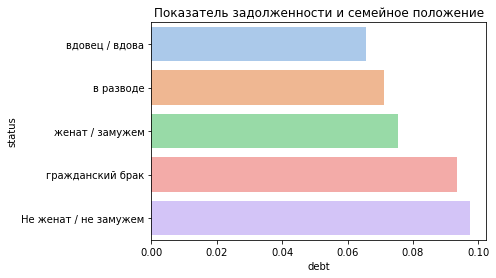

In [39]:
x = family_status_debt['debt']
y = family_status_debt['status']

sns.barplot(x, y, palette='pastel').set(title='Показатель задолженности и семейное положение');

Из этих данных мы можем увидеть, что:
 * Категория с самым низким показателем задолженности - это "вдовец / вдова";
 * Вторая после "вдовец / вдова", категория "в разводе" и третья "женат/замужем" получаются в середине выборки, значения средние;
 * Категория с самым высоким показателем по задолженности - это "не женат/не замужем";
 * Категория "граждански брак" также является высокой по риску задолженностей и лишь немного уступает не женатым клиентам.

**3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

Сопоставим клиентов по категориям доходов и показатели задолженности, чтобы ответить на этот вопрос:

In [40]:
total_income_debt = df.pivot_table(index ='total_income_category', values = 'debt').sort_values(by = ['debt'], ascending=True)

total_income_debt['total_income'] = ['30001 - 50000', '200001 - 1000000', 'over 1000000', '50001 - 200000', '0 - 30000']
display(total_income_debt)

,debt,total_income
total_income_category,,
D,0.060000,30001 - 50000
B,0.070635,200001 - 1000000
A,0.080000,over 1000000
C,0.084915,50001 - 200000
E,0.090909,0 - 30000


Построим график для наглядности:

C:\Users\Aliee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


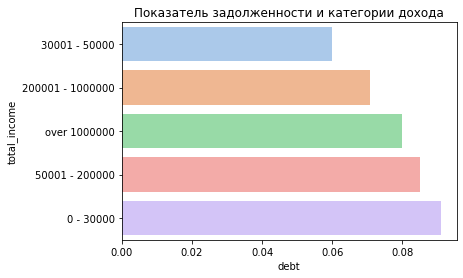

In [41]:
x = total_income_debt['debt']
y = total_income_debt['total_income']

sns.barplot(x, y, palette='pastel').set(title='Показатель задолженности и категории дохода');

Судя по получившимся данным, нельзя сказать, что чем больше доход, тем меньше клиенты имеют задолженностей по возврату кредитов: 
 * В зоне низкого показателя как клиенты с доходом от 30 до 50 тысяч, так и 200 тысяч - миллион; 
 * В зоне высокого риска, как клиенты с доходом 0 - 30 тысяч, так и клиенты с доходом до 200 тысяч; 
 * Самый низкий показатель у клиентов категории "D", 30 - 50 тысяч рублей; 
 * Самый высокий "Е" - от 0 до 30 тысяч.

**4.Как разные цели кредита влияют на его возврат в срок?**

Соотнесем данные по целям кредита и показатели наличия задолженностей по кредитам:

In [42]:
purpose_debt = df.pivot_table(index ='purpose_category', values = 'debt').sort_values(by = ['debt'], ascending=True)
display(purpose_debt)

,debt
purpose_category,
операции с недвижимостью,0.072340
проведение свадьбы,0.080034
получение образования,0.092920


По представленным данным можно сделать следующие выводы:

 * Самая рискованная в плане задолженностей категория кредитов на операции с автомобилем; 
 * Самая низкорискованная категория - операции с недвижимостью; 
 * Категории "проведения свадьбы" и "получение образования" - имеют средние показатели задолженностей.

## Общий вывод

В ходе анализа были проделаны следующие шаги:
- Описание цели исследования; 
- Обзор предоставленных данных для ознакомления и поиска ошибок/аномалий; 
- Далее была проведена работа по предобработке данных для дальнейшего анализа (заполнены пропуски в данных, удалены явные дубликаты, исправлены неявные, исправлены все найденные аномалии в данных); 
- После подготовки данных к анализу, была проведена работа по категоризации данных по уровню заработка клиентов и целей кредита, для удобства анализа; 
- Далее проведена работа по доказательству 4 поставленных в исследовании гипотиз: 
    1. Есть ли зависимость между количеством детей и возвратом кредита в срок?
    2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
    3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
    4. Как разные цели кредита влияют на его возврат в срок?

В ходе исследования мы установили, что на факт погашения кредитов в срок влияют:

- Семейное положение: высокий риск задолженностей у неженатых клиентов, самый низкий риск у вдовцов; 
- Наличие детей: чем больше детей, тем, в основном, риск выше, у бездетных клиентов самый низкий показатель; 
- Нет прямой зависимости "чем выше доход, тем меньше риск невозврата". Самые обеспеченые клиенты в середине рейтинга, самый высокий показатель задолженностей у клиентов с доходом от 0 до 30 тысяч, самый низкий у клиентов с доходом от 30 до 50 тысяч; 
- Цели кредита влияют на показатель наличия задолженности, "операции с недвижимостью" имеют самый низкий показатель, а "операции с автомобилем" - самый высокий.

Все выводы по поставленным вопросам могут быть использованы для принятия решений при выдаче последующих кредитов, для построения модели кредитного скоринга.